# DYNAMIC RIDE PRICE PREDICTION

### Goal:
To build a dynamic pricing model that maximize revenue and profitability and increase customer satisfaction.

### Objective:
1.Develop a predictive model that accurately estimates optimal fares for rides based on real-time market conditions and historical data.

2.Investigate the impact of various factors such as demand patterns, supply availability, and customer attributes on ride fares.

3.Implement a dynamic pricing strategy that adjusts fares in response to changing factors to maximize revenue and customer satisfaction.

### About Dataset
The dataset contains historical ride data.It includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Dataset link-https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

In [85]:
import warnings
warnings.filterwarnings('ignore')


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


#### DATA COLLECTION AND PREPROCESSING

In [87]:
#read the csv file
df=pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [88]:
#categorical and numerical columns
cat=[]
num=[]
#creating dataframe containing features of each column 
for col in df.columns:
    if df[col].dtype=='object':
        cat.append((col,df[col].nunique(),df[col].isnull().sum()))
    else:
        num.append((col,df[col].nunique(),df[col].isnull().sum(),df[col].skew()))
max_len=max(len(cat),len(num))
cat.extend([('','','')]*(max_len-len(cat)))
num.extend([('','','','')]*(max_len-len(num)))
#creating dictionary where key represents column and values represent list of corresponding data
data = {
    'Categorical_columns': [x[0] for x in cat],
    'cat_cols_uniques': [x[1] for x in cat],
    'cat_cols_missing': [x[2] for x in cat],
    'Numeric_columns': [x[0] for x in num],
    'int_cols_uniques': [x[1] for x in num],
    'int_cols_missing': [x[2] for x in num],
    'int_cols_skew': [x[3] for x in num]
}
#creatind dataframe
pd.DataFrame(data)

,Categorical_columns,cat_cols_uniques,cat_cols_missing,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,Location_Category,3,0,Number_of_Riders,81,0,0.002167
1,Customer_Loyalty_Status,3,0,Number_of_Drivers,79,0,0.963204
2,Time_of_Booking,4,0,Number_of_Past_Rides,101,0,-0.008457
3,Vehicle_Type,2,0,Average_Ratings,151,0,-0.078754
4,,,,Expected_Ride_Duration,171,0,-0.139868
5,,,,Historical_Cost_of_Ride,1000,0,0.209580


#### INFERENCE-

Based on the analysis of the dataset:

The dataset consists of 1000 entries with no missing values across all columns.
It comprises both categorical and numerical features:

##### Categorical Columns:

Location_Category: Represents the category of the ride location.
Unique Values: 3

Customer_Loyalty_Status: Indicates the loyalty status of the customer.
Unique Values: 3

Time_of_Booking: Indicates the time at which the ride was booked.
Unique Values: 4

Vehicle_Type: Represents the type of vehicle used for the ride.
Unique Values: 2

##### Numerical Columns:

Number_of_Riders: Indicates the number of riders for the ride.
Unique Values: 81

Number_of_Drivers: Indicates the number of drivers available for the ride.
Unique Values: 79

Number_of_Past_Rides: Represents the number of past rides taken by the customer.
Unique Values: 101

Average_Ratings: Represents the average ratings received by the ride service.
Unique Values: 151

Expected_Ride_Duration: Indicates the expected duration of the ride in minutes.
Unique Values: 171

Historical_Cost_of_Ride: Represents the historical cost of the ride.
Unique Values: 1000

In [89]:
#shape of the dataset
df.shape

(1000, 10)

#### DATA PREPROCESSING

In [90]:
#Information about dataset with datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [91]:
#Duplicate rows in the dataset
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### EXPLORATORY DATA ANALYSIS

In [92]:
## Descriptive statistics for all numerical columns
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [93]:
#General desciptive statistics for categorical columns
df.describe(include='object')

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


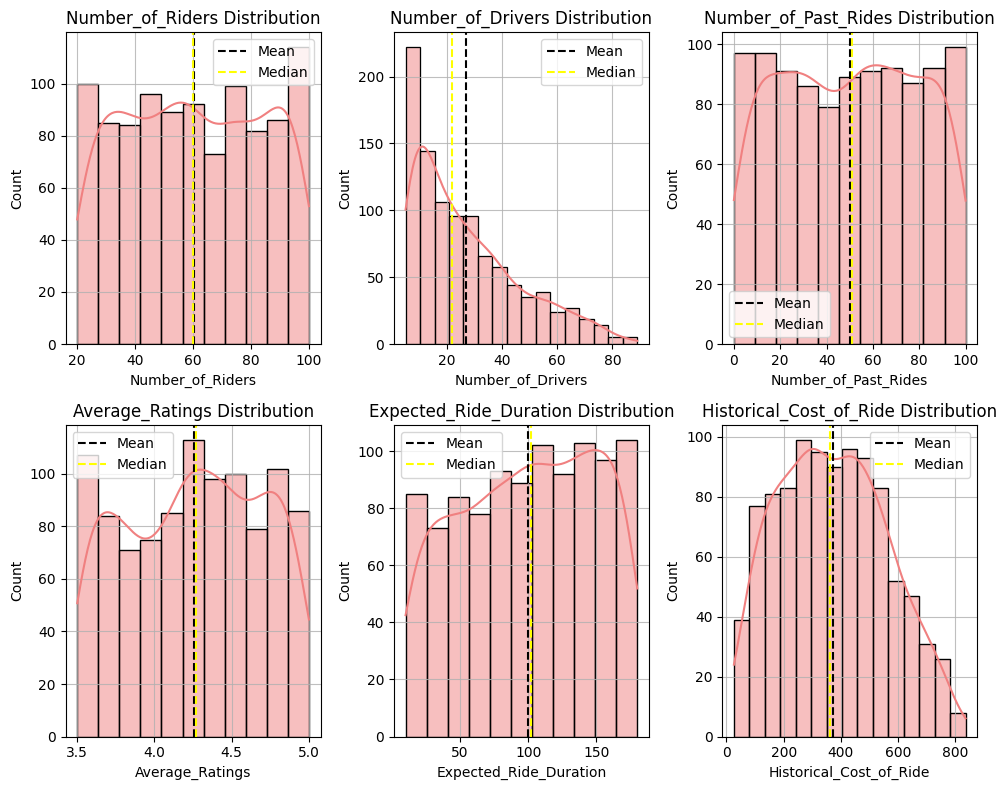

In [94]:
#Visualising numerical features distribution
numerics=df.select_dtypes(include='number')
# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)
# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))
#creating histogram plot for each numerical column
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i) 
    mean_values = numerics[col].mean()
    median = numerics[col].median()

    sns.histplot(numerics[col], kde=True, color='lightcoral')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Mean')
    plt.axvline(x=median, color='yellow', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8) 
    plt.title(f'{col} Distribution')
    plt.legend()

plt.tight_layout() 
plt.show()

#### INFERENCE-
Number_of_Riders: Uniformly distributed, indicating balanced rider data.

Number_of_Drivers: Right-skewed, suggesting most drivers fall within the lower count range with some having very high counts.

Number_of_Past_Rides: Uniform distribution, showing equal representation across ride history.

Average_Ratings: Slight right skew, with ratings clustered around higher values (4.0–4.5).

Expected_Ride_Duration: Left-skewed, meaning most rides are short but a few are long.

Historical_Cost_of_Ride: Right-skewed, with most rides being low-cost and some expensive outliers.



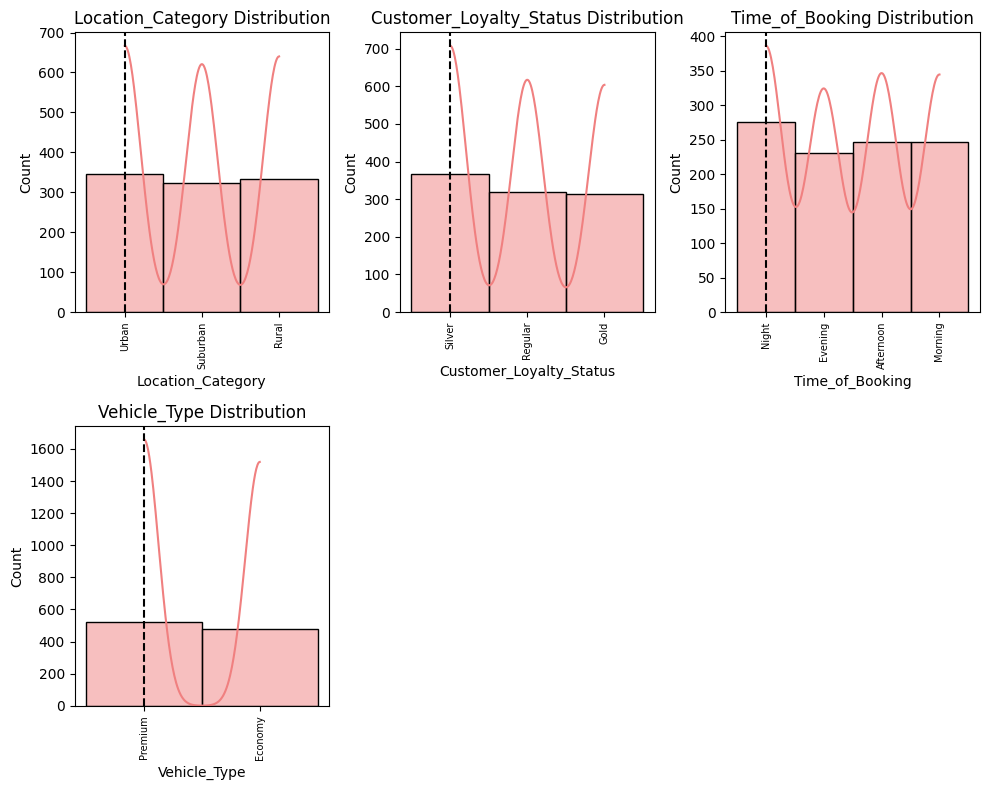

In [95]:
#Visualising categorical features distribution
categorical_cols = df.select_dtypes(include='object').columns
# Calculate the number of plots, rows, and columns for subplots
num_plots = len(categorical_cols)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)
# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))
#creating histogram subplot for each categorical column
for i, col in enumerate(df[categorical_cols], 1):
    mode = df[col].mode()[0]    
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(df[col], kde=True, color='lightcoral')
    plt.axvline(x=mode, color='black', linestyle='--', label='Mode')
    plt.xticks(rotation=90, fontsize=7)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()  



#### INFERENCE
Location_Category: Urban, Suburban, and Rural areas have nearly equal representation.

Customer_Loyalty_Status: Silver, Regular, and Gold loyalty statuses are almost evenly distributed.

Time_of_Booking: Bookings are fairly balanced across all times of day, with Night being slightly more common.

Vehicle_Type: Premium and Economy vehicles are used in nearly equal proportions.

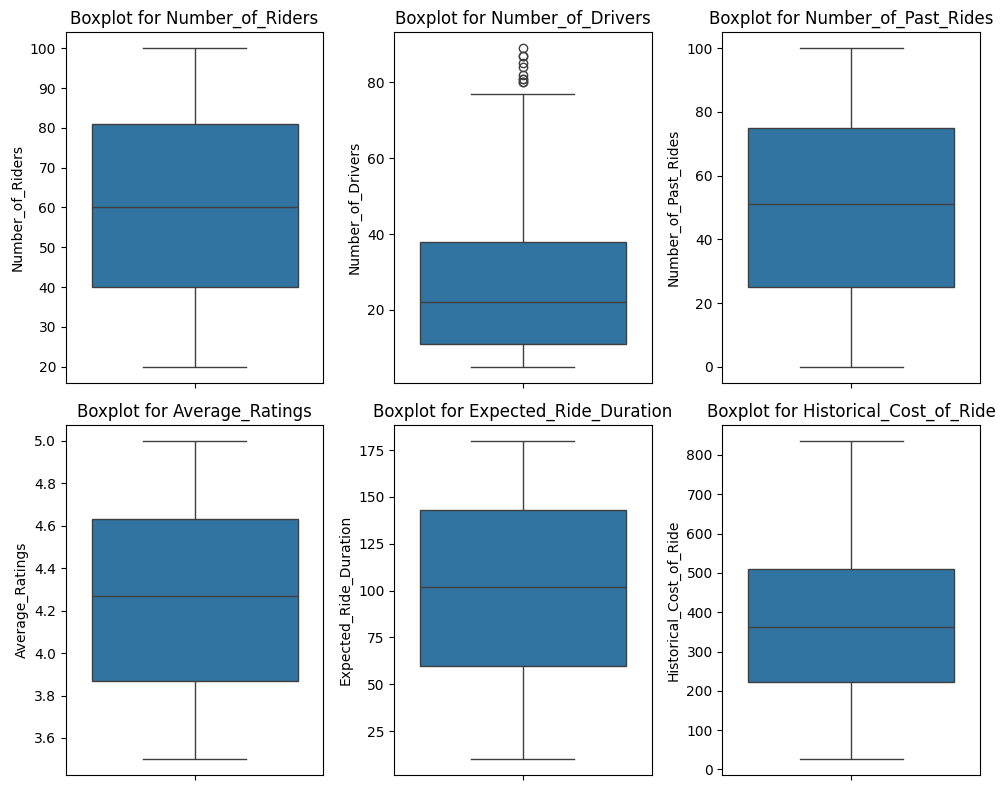

In [96]:
#Checking for outliers
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))
#boxplot for each numerical column
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(numerics[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

#### INFERENCE
Number_of_Riders:
Distribution is symmetric with no outliers, showing balanced rider counts.

Number_of_Drivers:
Shows multiple high-end outliers, indicating a few cases with very high driver counts.

Number_of_Past_Rides:
Wide range with a fairly symmetric distribution; no outliers, indicating stable ride history.

Average_Ratings:
Ratings are concentrated between 3.5 and 5, with no outliers, suggesting consistent customer satisfaction.

Expected_Ride_Duration:
Mild right skew with a wider spread; no extreme outliers, but longer durations are less frequent.

Historical_Cost_of_Ride:
Distribution is right-skewed with some high-cost rides, though they aren’t flagged as extreme outliers.



In [97]:
##Imputing outliers
features_to_fix = ['Number_of_Drivers', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
def impute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    skewness = df[column].skew()
    if abs(skewness) < 0.5:
        val = df[column].mean()
    else:
        val = df[column].median()

    # Impute only the outliers
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), val, df[column])
    return df

# Apply to each feature with outliers
for col in features_to_fix:
    df = impute_outliers(df, col)

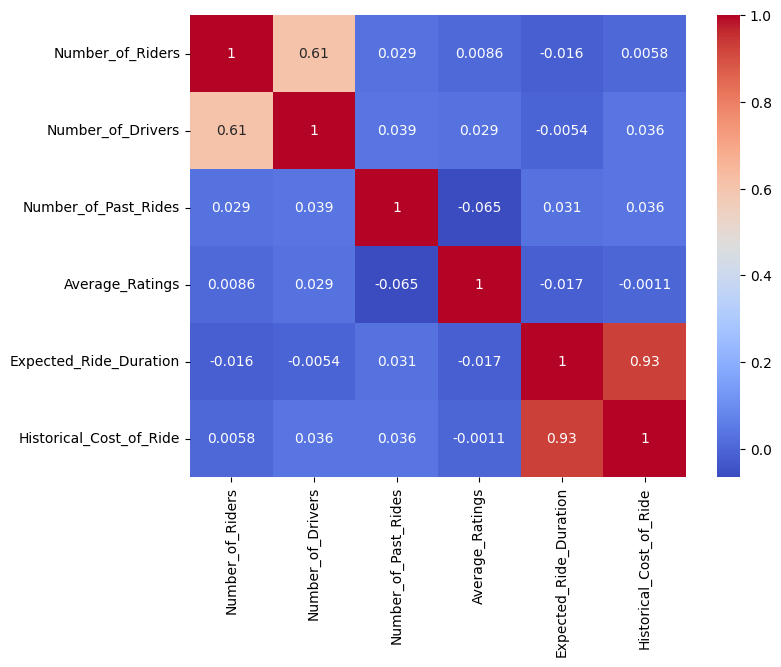

In [98]:
##Visualization of correlation among numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.show()

#### INFERENCE-
Expected_Ride_Duration and Historical_Cost_of_Ride have a very strong positive correlation (0.93), indicating longer rides cost more.

Number_of_Riders and Number_of_Drivers show a moderate positive correlation (0.61), suggesting supply follows demand.

Other features have negligible or very weak correlations (close to 0), implying they are largely independent.

No significant negative correlations were found, so no strong inverse relationships exist among variables.


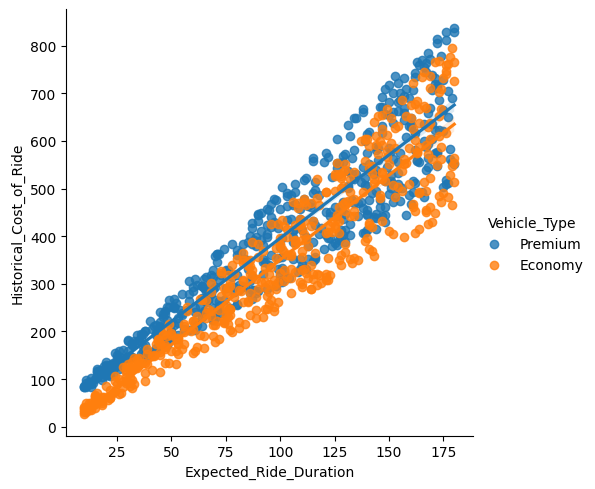

In [99]:
#scatter plot with linear regression lines 
sns.lmplot(data=df, y='Historical_Cost_of_Ride', x='Expected_Ride_Duration', hue='Vehicle_Type')
plt.show()

#### INFERENCE
Premium rides generally cost more than Economy rides for the same duration.

The linear trendlines suggest pricing is consistently duration-based, but for Premium vehicles cost increases more rapidly with ride duration.

### FEATURE ENGINEERING

#### GOAL-To create a fair and responsive pricing system that reflects actual demand and supply pressure.

Dynamic Pricing Calculation:

<u> Demand Multiplier:</U>

- Uses 75th and 25th percentiles of Number_of_Riders.
- High demand → divide by high percentile.
- Low demand → divide by low percentile.

<u> Supply Multiplier:</u>

- Uses 75th and 25th percentiles of Number_of_Drivers.
- High supply → divide high percentile by driver count.
- Low supply → divide low percentile by driver count.

<u> Thresholds Defined:</u>

- Predefined thresholds for demand and supply (high & low) guide adjustments.

<u> Adjusted Ride Cost:</u>

Combines:

- max(demand_multiplier, demand_threshold_low)
- max(supply_multiplier, supply_threshold_high)
- Final cost = Historical_Cost_of_Ride × demand factor × supply factor

In [100]:
# Calculating demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25
df['demand_multiplier']=np.where(df['Number_of_Riders']>np.percentile(df['Number_of_Riders'],high_demand_percentile),df['Number_of_Riders']/np.percentile(df['Number_of_Riders'],high_demand_percentile),df['Number_of_Riders']/np.percentile(df['Number_of_Riders'],low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25
df['supply_multiplier']=np.where(df['Number_of_Drivers']>np.percentile(df['Number_of_Drivers'],low_supply_percentile),np.percentile(df['Number_of_Drivers'],high_supply_percentile)/df['Number_of_Drivers'],np.percentile(df['Number_of_Drivers'],low_supply_percentile)/df['Number_of_Drivers'])

# Defining price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2 
demand_threshold_low = 0.8
supply_threshold_high = 0.8 
supply_threshold_low = 1.2

# Calculating adjusted_ride_cost for dynamic pricing
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (np.maximum(df['demand_multiplier'], demand_threshold_low) *
    np.maximum(df['supply_multiplier'], supply_threshold_high)
)

In [101]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost
0,90,45.0,Urban,Silver,13,4.47,Night,Premium,90.0,284.257273,1.111111,0.822222,259.691830
1,58,39.0,Suburban,Silver,72,4.06,Evening,Economy,43.0,173.874753,1.450000,0.948718,239.189243
2,42,31.0,Rural,Silver,0,3.99,Afternoon,Premium,76.0,329.795469,1.050000,1.193548,413.308193
3,89,28.0,Rural,Regular,67,4.31,Afternoon,Premium,134.0,470.201232,1.098765,1.321429,682.703993
4,78,22.0,Rural,Regular,74,3.77,Afternoon,Economy,149.0,579.681422,1.950000,1.681818,1901.091574


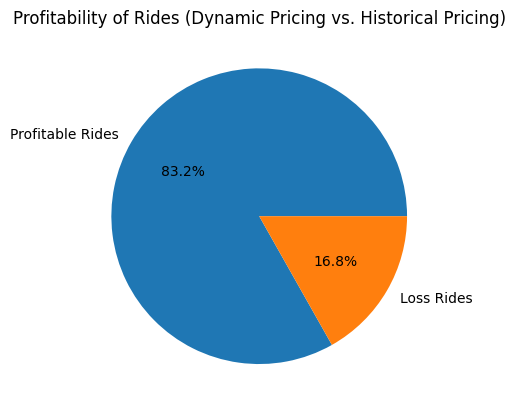

In [102]:
#Profitability analysis of Rides
#Calculating profite percentage of each ride
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) 
                           / df['Historical_Cost_of_Ride']) * 100

# Identify profitable rides and loss rides
profitable_rides = df[df['profit_percentage'] > 0]
loss_rides = df[df['profit_percentage'] < 0]

#count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

#creating pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
plt.show()

##### TRANSFORMATION OF TARGET VARIABLE


In [103]:
# Calculating the skewness of the target variable
print("Skewness: ", round(df['adjusted_ride_cost'].skew(), 2))

Skewness:  1.56


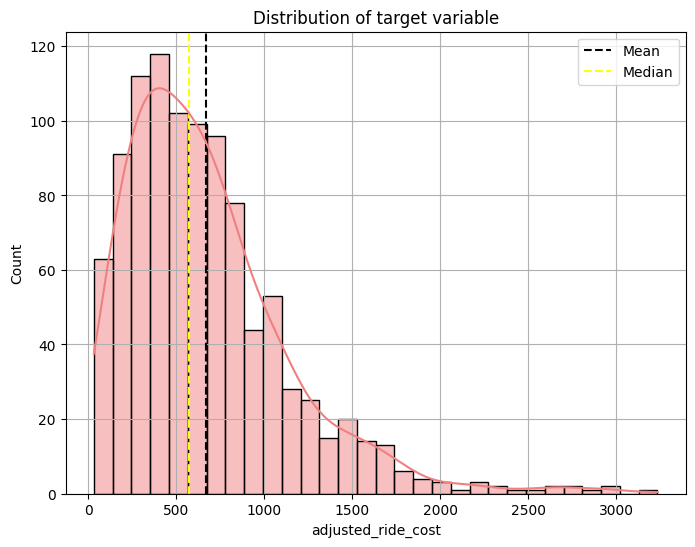

In [104]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
mean_values = df['adjusted_ride_cost'].mean()
median = df['adjusted_ride_cost'].median()

# Adding vertical lines for mean and median to the plot
plt.axvline(x=mean_values, color='black', linestyle='--', label='Mean')
plt.axvline(x=median, color='yellow', linestyle='--', label='Median')

# Creating a histogram plot
sns.histplot(df['adjusted_ride_cost'], kde=True, color='lightcoral')
plt.grid(True)
plt.legend()
plt.title('Distribution of target variable')
plt.show()

In [105]:
# Applying the natural logarithm transformation
df['adjusted_ride_cost'] = np.log1p(df['adjusted_ride_cost'])

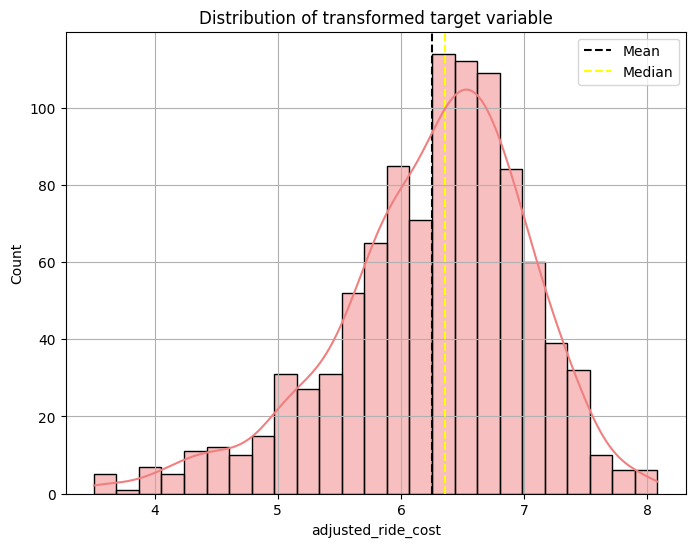

In [106]:
# Distribution of transformed target variable
plt.figure(figsize=(8, 6))
mean_values = df['adjusted_ride_cost'].mean()
median = df['adjusted_ride_cost'].median()

# Adding vertical lines for mean and median to the plot
plt.axvline(x=mean_values, color='black', linestyle='--', label='Mean')
plt.axvline(x=median, color='yellow', linestyle='--', label='Median')

# Creating a histogram plot
sns.histplot(df['adjusted_ride_cost'], kde=True, color='lightcoral')
plt.grid(True)
plt.title('Distribution of transformed target variable')
plt.legend()
plt.show()

In [107]:
# Calculate the skewness of the transformed target variable 
print("Skewness: ", round(df['adjusted_ride_cost'].skew(), 2))

Skewness:  -0.71


In [108]:
#Skewness of Number_of_Drivers feature
print("Skewness: ", round(df['Number_of_Drivers'].skew(), 2))

Skewness:  0.91


In [109]:
# Applying the natural logarithm transformation and printing skewness
df['Number_of_Drivers'] = np.log1p(df['Number_of_Drivers'])
print("Skewness: ", round(df['Number_of_Drivers'].skew(), 2))

Skewness:  -0.08


#### SPLITTING OF DATA

In [110]:
#Splitting into Predictor variables and target variable
Target=df['adjusted_ride_cost']
df=df.drop(columns=['adjusted_ride_cost'])

In [111]:
# Counting the number of columns for each data type
df.dtypes.value_counts()

float64    7
object     4
int64      2
Name: count, dtype: int64

##### Capturing non-linear relationship between Number_of_Riders and Number_of_Drivers and enhance model performance by adding a derived feature.

- Map vehicle types to numeric values
  - 'Economy' → 0, 'Premium' → 1

- Select key features
  - Include: Number_of_Riders, Number_of_Drivers, Expected_Ride_Duration, and Vehicle_Type

- Fit a second-degree polynomial
  - Use np.polyfit() to find the relationship between Number_of_Riders and Number_of_Drivers

- Create the polynomial function
  - Use np.poly1d() to generate a function from the fitted coefficients

- Generate interpolated feature
  - Compute Number_of_Riders / Number_of_Drivers
  - Pass this through the polynomial to get the interpolated_division feature

In [129]:
df['Vehicle_Type'] = df['Vehicle_Type'].map({'Economy': 0, 'Premium': 1})

# Assigning the feature matrix X
X = df[['Number_of_Riders', 'Number_of_Drivers', 'Expected_Ride_Duration', 'Vehicle_Type']]

# Polynomial fit
coefficients = np.polyfit(X['Number_of_Riders'].values, X['Number_of_Drivers'].values, deg=2)
print(coefficients)

poly = np.poly1d(coefficients)

division_feature = poly(X['Number_of_Riders'].values / X['Number_of_Drivers'].values)

X['interpolated_division'] = pd.Series(division_feature)

[-1.58274467e-04  3.66151219e-02  1.53967982e+00]


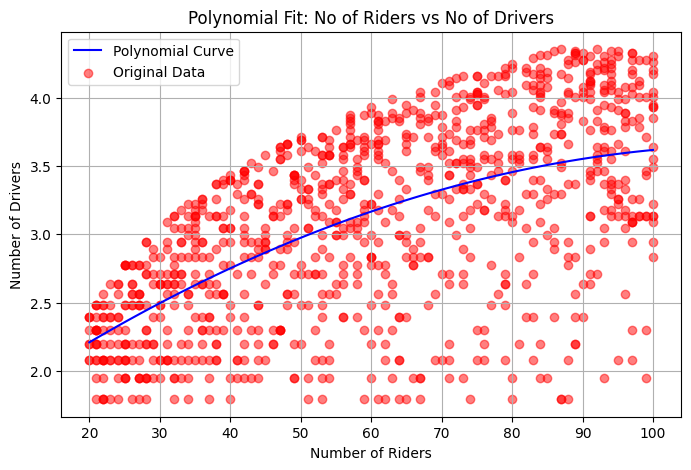

In [113]:
# Plotting of polynomial
x_vals = np.linspace(min(df['Number_of_Riders']), max(df['Number_of_Riders']), 100)
y_vals = poly(x_vals)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, color='blue', label='Polynomial Curve')
plt.scatter(df['Number_of_Riders'], df['Number_of_Drivers'], color='red', alpha=0.5, label='Original Data')
plt.xlabel('Number of Riders')
plt.ylabel('Number of Drivers')
plt.title('Polynomial Fit: No of Riders vs No of Drivers')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
X.head()

,Number_of_Riders,Number_of_Drivers,Expected_Ride_Duration,Vehicle_Type,interpolated_division
0,90,3.828641,90.0,1,2.312933
1,58,3.688879,43.0,0,2.076250
2,42,3.465736,76.0,1,1.960161
3,89,3.367296,134.0,1,2.396876
4,78,3.135494,149.0,0,2.352588


In [115]:
# Standardizing the features in the dataset (X) using the StandardScaler 
import pickle
from sklearn.preprocessing import StandardScaler
y=Target
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pickle.dump(scaler, open("scaler.pkl",'wb'))

In [116]:
#Splitting the scaled fetaures and the target variable into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### MODEL TRAINING AND MODEL EVALUATION

In [117]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#Regression Models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor()
    }

#Hyperparameter grids
params = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.001, 0.01, 0.1]},
    'ElasticNet': {'model__alpha': [0.001, 0.01, 0.1], 'model__l1_ratio': [0.2, 0.5, 0.8]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__epsilon': [0.1, 0.2, 0.5], 'model__kernel': ['linear', 'rbf']},
    'RandomForestRegressor': {'model__n_estimators': [10, 50, 100]}}

In [118]:
#Root Mean Squared Error(RMSE) Function
from sklearn.metrics import mean_squared_error,make_scorer
def rmse(y_true,y_pred):
    return math.sqrt(mean_squared_error(y_true,y_pred))

# Creating a custom scorer 'rmse_scorer' using make_scorer
# 'greater_is_better=False' indicates that lower values of the scoring function are better
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [119]:
#evaluation of each model.
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
results=[]
best_model=None
best_r2=float('-inf')

for name,model in models.items():
    pipeline = Pipeline([('model', model)])
    if name in params:
        grid_search = GridSearchCV(pipeline, params[name], cv=5, scoring=rmse_scorer)
    else:
        grid_search = GridSearchCV(pipeline, {}, cv=5, scoring=rmse_scorer)
      
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
    rmse_val = rmse(np.expm1(y_test), np.expm1(y_pred))

    if r2 > best_r2:
        best_r2 = r2
        best_model = grid_search
    
    # Appending the results to the results list
    results.append({
        'Model': name,
        'R-Squared Score': r2,
        'RMSE Score': rmse_val,
        'Best Parameters': grid_search.best_params_
    })

    results_df = pd.DataFrame(results)

In [120]:
pd.set_option('display.max_colwidth', None)
results_df

,Model,R-Squared Score,RMSE Score,Best Parameters
0,Ridge,0.460495,321.262581,{'model__alpha': 0.1}
1,Lasso,0.466072,319.597720,{'model__alpha': 0.001}
2,ElasticNet,0.463765,320.287429,"{'model__alpha': 0.001, 'model__l1_ratio': 0.2}"
3,SVR,0.706802,236.833439,"{'model__C': 10, 'model__epsilon': 0.2, 'model__kernel': 'rbf'}"
4,RandomForestRegressor,0.854571,166.796701,{'model__n_estimators': 100}


In [121]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

#R2 Score
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8545712329201073


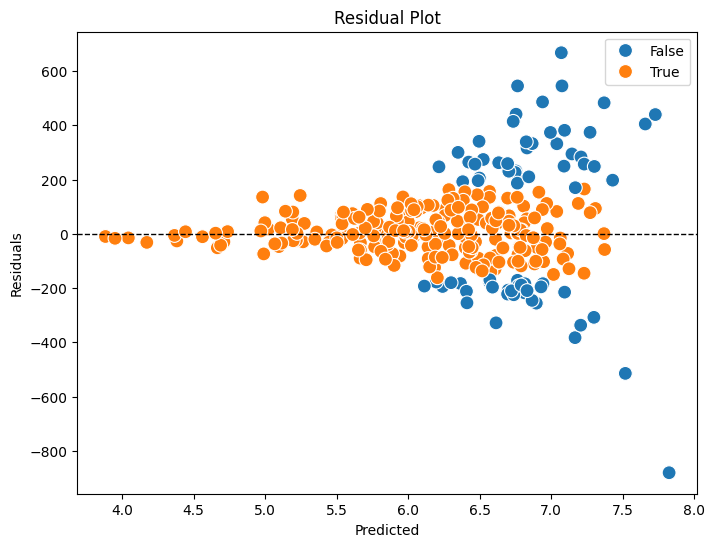

In [122]:
##Residual plot to evaluate performance of the predictive model
residuals = np.expm1(y_test) - np.expm1(y_pred)
sigma = np.std(residuals)
hue = list(map(lambda x: abs(x) < sigma, residuals))

#Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, hue=hue,s=100)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### INFERENCE

- Most points are close to the center line, showing good predictions.

- But as predicted values increase, errors also increase — this means the model struggles more with higher values.

- Some points (blue) are outliers, meaning the predictions were far off from actual values.

#### PREDICTION

In [123]:
# Function to map vehicle type to numeric value
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {"Premium": 1,"Economy": 0}
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric

In [124]:
# Predicting price using user input values
def predict_price(number_of_riders, number_of_drivers, Expected_Ride_Duration, vehicle_type):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    number_of_riders = np.array(number_of_riders)
    number_of_drivers = np.array(number_of_drivers)
    
    # Fit a polynomial regression model to the data
    coefficients = np.polyfit(number_of_riders.ravel(), number_of_drivers.ravel(), deg=2)
    poly = np.poly1d(coefficients)
    division_feature = poly(number_of_riders / number_of_drivers)
    
    input_data = np.array([number_of_riders, number_of_drivers, Expected_Ride_Duration, vehicle_type_numeric, division_feature])
    
    input = pd.DataFrame(input_data.reshape(1, -1))
    
    # Scale input data using scaler object
    scaled_input_data = scaler.transform(input)
    
    #prediction
    predicted_price = best_model.predict(scaled_input_data)
    return predicted_price

In [125]:
# Example
user_number_of_riders = 42
user_number_of_drivers = 31
user_vehicle_type = "Premium"
Expected_Ride_Duration = 76
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, Expected_Ride_Duration, user_vehicle_type)
print("Predicted price:", np.expm1(predicted_price))

Predicted price: [347.3643021]


In [126]:
pickle.dump(best_model, open("model.pkl",'wb'))